In [2]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the lat and long to a list 
coordinates = list(lat_lngs)

In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [8]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=a7668ab595e10e77853ebca2593291c9


In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saskylakh
Processing Record 2 of Set 1 | bismarck
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | kapaa
Processing Record 5 of Set 1 | banda aceh
Processing Record 6 of Set 1 | hasaki
Processing Record 7 of Set 1 | pacific grove
Processing Record 8 of Set 1 | puerto ayora
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | mataura
Processing Record 11 of Set 1 | ancud
Processing Record 12 of Set 1 | lorengau
Processing Record 13 of Set 1 | vaini
Processing Record 14 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 15 of Set 1 | boa vista
Processing Record 16 of Set 1 | khatanga
Processing Record 17 of Set 1 | maltahohe
Processing Record 18 of Set 1 | albany
Processing Record 19 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 20 of Set 1 | solnechnyy
Processing Record 21 of Set 1 | gat
Processing Record 22 of Set 1 | h

Processing Record 36 of Set 4 | gra liyia
Processing Record 37 of Set 4 | nacimiento
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | saint-philippe
Processing Record 40 of Set 4 | jalingo
Processing Record 41 of Set 4 | torbay
Processing Record 42 of Set 4 | galesong
Processing Record 43 of Set 4 | amderma
City not found. Skipping...
Processing Record 44 of Set 4 | calama
Processing Record 45 of Set 4 | muros
Processing Record 46 of Set 4 | belen
Processing Record 47 of Set 4 | japura
Processing Record 48 of Set 4 | pevek
Processing Record 49 of Set 4 | neiafu
Processing Record 50 of Set 4 | tsihombe
City not found. Skipping...
Processing Record 1 of Set 5 | chicama
Processing Record 2 of Set 5 | lisieux
Processing Record 3 of Set 5 | alofi
Processing Record 4 of Set 5 | bondo
Processing Record 5 of Set 5 | papara
Processing Record 6 of Set 5 | mount gambier
Processing Record 7 of Set 5 | la rioja
Processing Record 8 of Set 5 | rawson
Processing Record 9 of Set

Processing Record 24 of Set 8 | ostrowiec swietokrzyski
Processing Record 25 of Set 8 | pochutla
Processing Record 26 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 27 of Set 8 | kamaishi
Processing Record 28 of Set 8 | kidal
Processing Record 29 of Set 8 | salisbury
Processing Record 30 of Set 8 | dahuk
Processing Record 31 of Set 8 | fare
Processing Record 32 of Set 8 | aitape
Processing Record 33 of Set 8 | riachao das neves
Processing Record 34 of Set 8 | urdzhar
City not found. Skipping...
Processing Record 35 of Set 8 | voh
Processing Record 36 of Set 8 | terra santa
Processing Record 37 of Set 8 | cururupu
Processing Record 38 of Set 8 | madang
Processing Record 39 of Set 8 | mackay
Processing Record 40 of Set 8 | lhokseumawe
Processing Record 41 of Set 8 | teguldet
Processing Record 42 of Set 8 | abnub
Processing Record 43 of Set 8 | kaeo
Processing Record 44 of Set 8 | xai-xai
Processing Record 45 of Set 8 | lavrentiya
Processing Record 46 of Set 8 | ton

Processing Record 10 of Set 12 | plyussa
Processing Record 11 of Set 12 | mikkeli
Processing Record 12 of Set 12 | lagoa
Processing Record 13 of Set 12 | egvekinot
Processing Record 14 of Set 12 | bridlington
Processing Record 15 of Set 12 | clovis
Processing Record 16 of Set 12 | eugene
Processing Record 17 of Set 12 | nguiu
City not found. Skipping...
Processing Record 18 of Set 12 | tiznit
Processing Record 19 of Set 12 | chancay
Processing Record 20 of Set 12 | enkoping
Processing Record 21 of Set 12 | bitterfeld
Processing Record 22 of Set 12 | pringsewu
Processing Record 23 of Set 12 | peniche
Processing Record 24 of Set 12 | hambantota
Processing Record 25 of Set 12 | rangapara
Processing Record 26 of Set 12 | chachapoyas
Processing Record 27 of Set 12 | saint-augustin
Processing Record 28 of Set 12 | republic
Processing Record 29 of Set 12 | road town
Processing Record 30 of Set 12 | hanna
Processing Record 31 of Set 12 | husavik
Processing Record 32 of Set 12 | kurilsk
Process

In [10]:
len(city_data)

579

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saskylakh,71.9167,114.0833,-34.94,95,42,1.52,RU,2021-03-04 04:11:21
1,Bismarck,46.8083,-100.7837,37.00,75,1,8.05,US,2021-03-04 04:07:47
2,Tuktoyaktuk,69.4541,-133.0374,-23.80,76,75,3.44,CA,2021-03-04 04:11:21
3,Kapaa,22.0752,-159.3190,71.60,73,75,16.11,US,2021-03-04 04:11:22
4,Banda Aceh,5.5577,95.3222,86.58,64,5,11.88,ID,2021-03-04 04:11:22
5,Hasaki,35.7333,140.8333,57.00,62,75,11.50,JP,2021-03-04 04:11:23
6,Pacific Grove,36.6177,-121.9166,51.01,89,1,5.55,US,2021-03-04 04:11:23
7,Puerto Ayora,-0.7393,-90.3518,77.00,96,88,1.61,EC,2021-03-04 04:11:23
8,Ushuaia,-54.8000,-68.3000,50.00,66,0,5.75,AR,2021-03-04 04:11:23
9,Mataura,-46.1927,168.8643,63.00,56,13,3.00,NZ,2021-03-04 04:11:24


In [12]:
# Change order of columns 
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
# Change column order in DataFrame
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saskylakh,RU,2021-03-04 04:11:21,71.9167,114.0833,-34.94,95,42,1.52
1,Bismarck,US,2021-03-04 04:07:47,46.8083,-100.7837,37.00,75,1,8.05
2,Tuktoyaktuk,CA,2021-03-04 04:11:21,69.4541,-133.0374,-23.80,76,75,3.44
3,Kapaa,US,2021-03-04 04:11:22,22.0752,-159.3190,71.60,73,75,16.11
4,Banda Aceh,ID,2021-03-04 04:11:22,5.5577,95.3222,86.58,64,5,11.88
5,Hasaki,JP,2021-03-04 04:11:23,35.7333,140.8333,57.00,62,75,11.50
6,Pacific Grove,US,2021-03-04 04:11:23,36.6177,-121.9166,51.01,89,1,5.55
7,Puerto Ayora,EC,2021-03-04 04:11:23,-0.7393,-90.3518,77.00,96,88,1.61
8,Ushuaia,AR,2021-03-04 04:11:23,-54.8000,-68.3000,50.00,66,0,5.75
9,Mataura,NZ,2021-03-04 04:11:24,-46.1927,168.8643,63.00,56,13,3.00


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

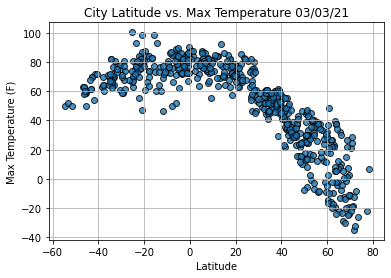

In [17]:
# Import time module
import time

# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

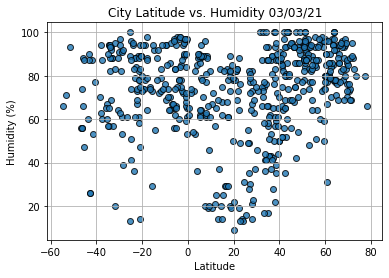

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

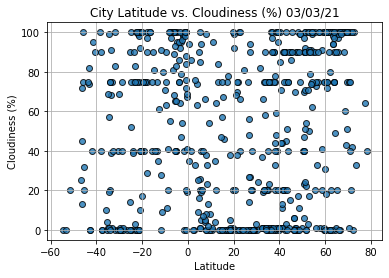

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

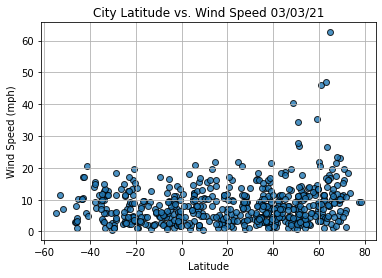

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()